In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

np.random.seed(12345)

## Import data

In [2]:
draws = pd.read_csv('../data/processed/draws.csv', index_col=0)
shares = pd.read_csv('../data/processed/shares.csv')
outlets = pd.read_csv('../data/processed/outlets.csv')
structure = pd.read_csv('../data/processed/structure.csv')

In [3]:
draws['payoff'] = draws['total_distributed'] / (draws['prize_pool'] / 0.5)
draws.loc[draws.index < 2995, 'format'] = '456'
draws.loc[draws.index >= 2995, 'format'] = '496'
numbers = draws.loc[:, 'win_1':'additional']
draws.drop(columns=['win_1', 'win_2', 'win_3', 'win_4', 'win_5', 'win_6', 'additional'], inplace=True)

In [4]:
draws.head()

,draw_date,week,day_of_week,is_hong_bao,total_distributed,total_allocated,prize_pool,snowballed_1,snowballed_2,consecutive,discrepency,payoff,format
draw_no,,,,,,,,,,,,,
1335,"Thu, 12 Nov 1998",1998W46,4,0,904459,1404459,1439536,0,0,0,75616,0.314149,456
1336,"Mon, 16 Nov 1998",1998W47,1,0,1484950,2180546,2184513,500000,0,1,-76646,0.339881,456
1337,"Thu, 19 Nov 1998",1998W47,4,0,2403260,3668417,3834538,1195596,0,2,-1345,0.313370,456
1338,"Mon, 23 Nov 1998",1998W48,1,0,11453121,8992368,9521025,2460753,0,3,-3229,0.601465,456
1339,"Thu, 26 Nov 1998",1998W48,4,0,1441537,1441537,1534315,0,0,0,-912,0.469766,456


In [5]:
numbers.head()

,win_1,win_2,win_3,win_4,win_5,win_6,additional
draw_no,,,,,,,
1335,1,2,22,25,28,39,4
1336,9,18,22,32,34,39,15
1337,1,2,7,28,35,37,40
1338,7,23,34,36,42,43,37
1339,10,21,24,25,36,42,41


In [6]:
shares.head()

,draw,group,shareAmount,numberOfShares,snowballed,cascaded,allocated
0,1335,Group 1,500000,0,NaN,NaN,500000
1,1335,Group 2,187090,1,NaN,NaN,187090
2,1335,Group 3,1853,101,NaN,NaN,187153
3,1335,Group 4,709,264,NaN,NaN,187176
4,1335,Group 5,30,5964,NaN,NaN,178920


In [7]:
outlets.head()

,draw,group,outlet,quickpick,bet_type
0,1338,Group 1,Nan Huat Wine Store - Blk 513 Bishan St 13 #01...,1,System 7 Entry
1,1339,Group 1,Seng Yeok Chan Agency - Blk 338 Ang Mo Kio Ave...,0,System Roll Entry
2,1340,Group 1,Milly Trading Store - Blk 374 Bukit Batok St 3...,1,Ordinary Entry
3,1340,Group 1,Papillon Florist Pte Ltd - Blk 133 Jalan Bukit...,0,Ordinary Entry
4,1342,Group 1,Vijaya Darshana Agency - 810 Geylang Rd City P...,1,System 8 Entry


## Number appearance

In [8]:
numbers['draw'] = numbers.index
numbers_melted = numbers.melt(id_vars=['draw'], var_name='label')

In [9]:
number_appearance_456 = numbers_melted[numbers_melted['draw'] < 2995].groupby('value')['draw'].count()
number_appearance_496 = numbers_melted[numbers_melted['draw'] >= 2995].groupby('value')['draw'].count()

In [10]:
number_appearance_456 /= (draws['format'] == '456').sum() / (7 / 45)
number_appearance_496 /= (draws['format'] == '496').sum() / (7 / 49)

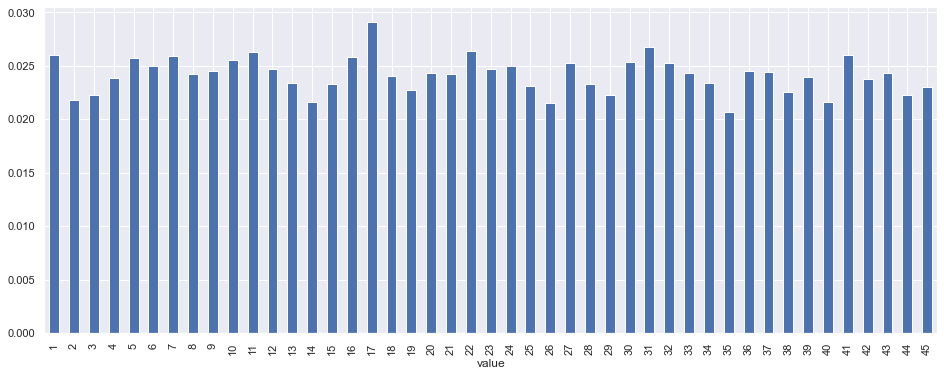

In [11]:
number_appearance_456.plot(kind='bar', figsize=(16,6));

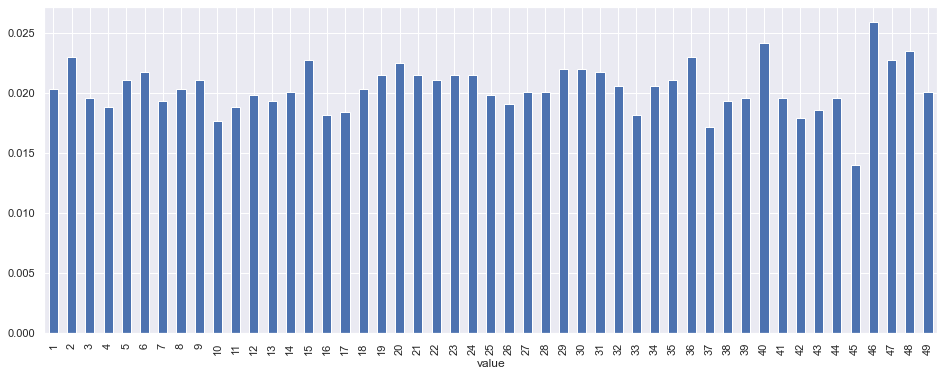

In [12]:
number_appearance_496.plot(kind='bar', figsize=(16,6));

## Most popularity numbers

In [13]:
shares_pvt = pd.pivot_table(shares, values='numberOfShares', index='draw', columns='group')
shares_pvt['format'] = draws['format']
shares_pvt['additional'] = numbers['additional']

In [14]:
num_attrs = pd.DataFrame({'num': range(1, 50)})
num_attrs['first_digit'] = num_attrs['num'] // 10
num_attrs['last_digit'] = num_attrs['num'] % 10
num_attrs['row'] = (num_attrs['num'] - 1) // 9
num_attrs['col'] = (num_attrs['num'] - 1) % 9
num_attrs.set_index('num', inplace=True)

In [15]:
shares_pvt['incl_additional'] = shares_pvt['Group 2'] + shares_pvt['Group 4'] + shares_pvt['Group 6']
ticket_price = draws['format'].map({'456': 0.5, '496': 1.0})
shares_pvt['tickets_sold'] = draws['prize_pool'] / 0.5 / ticket_price

In [16]:
shares_pvt.head()

group,Group 1,Group 2,Group 3,Group 4,Group 5,Group 6,Group 7,format,additional,incl_additional,tickets_sold
draw,,,,,,,,,,,
1335,0.0,1.0,101.0,264.0,5964.0,8206.0,NaN,456,4,8471.0,5758144.0
1336,0.0,4.0,212.0,616.0,10085.0,16522.0,NaN,456,15,17142.0,8738052.0
1337,0.0,10.0,320.0,875.0,17131.0,19681.0,NaN,456,40,20566.0,15338152.0
1338,1.0,29.0,796.0,2192.0,38351.0,49335.0,NaN,456,37,51556.0,38084100.0
1339,1.0,4.0,160.0,291.0,5971.0,7885.0,NaN,456,41,8180.0,6137260.0


In [17]:
def get_popularity(df, norm_factor):
    output = pd.pivot_table(df, values=['incl_additional', 'tickets_sold'], index='additional')
    output['norm_popularity'] = output['incl_additional'] / output['tickets_sold']
    output['norm_popularity'] = output['norm_popularity'] / norm_factor
    return output.join(num_attrs)

In [18]:
def layout_numbers(data, rows, cols, pad):
    arr = np.array(data)
    return np.pad(arr, (0, rows * cols - len(arr)), 'constant', constant_values=(pad, pad)).reshape(rows, cols)

In [19]:
norm_factor_456 = structure[(structure['format'] == 456) & (structure['bet_type'] == 'Ordinary') & (structure['match'].isin(['Group 2', 'Group 4', 'Group 6']))]['probability'].sum()
norm_factor_496 = structure[(structure['format'] == 496) & (structure['bet_type'] == 'Ordinary') & (structure['match'].isin(['Group 2', 'Group 4', 'Group 6']))]['probability'].sum()

In [20]:
popularity_456 = get_popularity(shares_pvt[draws['format'] == '456'], norm_factor_456)
popularity_456_sorted = popularity_456.sort_values('norm_popularity', ascending=False)
print(popularity_456_sorted['norm_popularity'].iloc[0])
print(popularity_456_sorted['norm_popularity'].iloc[-1])

1.2261481653745814
0.7563271071046479


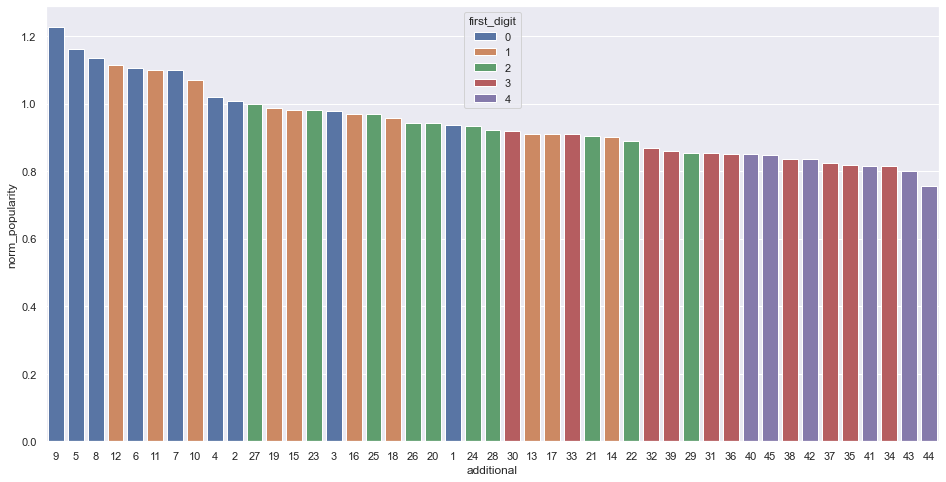

In [21]:
plt.figure(figsize=(16,8))
sns.barplot(data=popularity_456, x=popularity_456.index, y='norm_popularity', hue='first_digit', order=popularity_456_sorted.index, dodge=False);

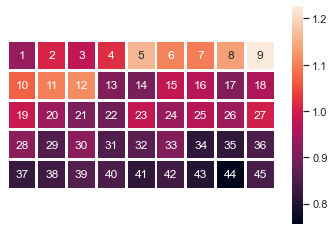

In [22]:
sns.heatmap(data=layout_numbers(popularity_456['norm_popularity'], 5, 9, 1), annot=layout_numbers(popularity_456.index, 5, 9, 0),
            square=True, linewidths=2, xticklabels=False, yticklabels=False);

In [23]:
popularity_496 = get_popularity(shares_pvt[draws['format'] == '496'], norm_factor_496)
popularity_496_sorted = popularity_496.sort_values('norm_popularity', ascending=False)
print(popularity_496_sorted['norm_popularity'].iloc[0])
print(popularity_496_sorted['norm_popularity'].iloc[-1])

1.232246926401228
0.7490265438923049


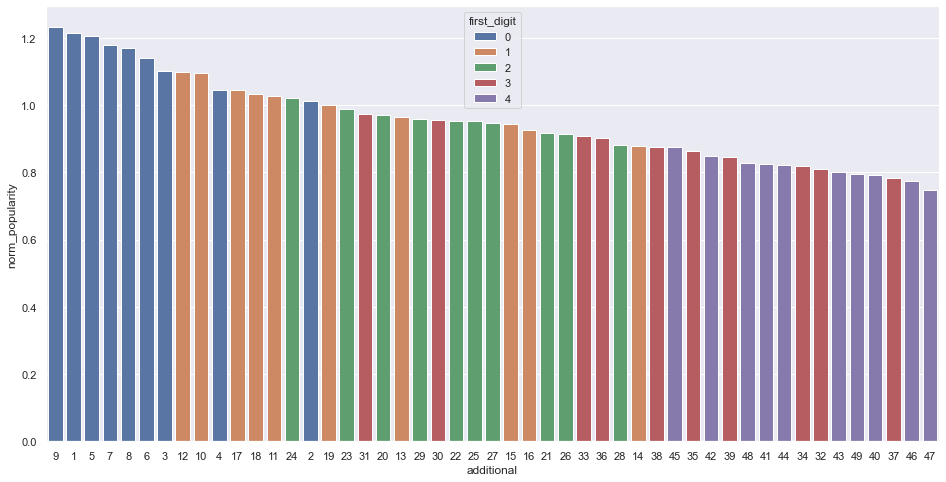

In [24]:
plt.figure(figsize=(16,8))
sns.barplot(data=popularity_496, x=popularity_496.index, y='norm_popularity', hue='first_digit', order=popularity_496_sorted.index, dodge=False);

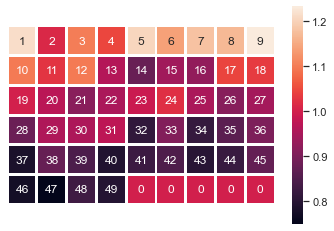

In [25]:
sns.heatmap(data=layout_numbers(popularity_496['norm_popularity'], 6, 9, 1), annot=layout_numbers(popularity_496.index, 6, 9, 0),
            square=True, linewidths=2, xticklabels=False, yticklabels=False);

## Classification

In [26]:
min_draws = shares[
    (shares['group'] == 'Group 1') &
    (((shares['allocated'] == 500000) & (shares['draw'] < 2995)) | ((shares['allocated'] == 1000000) & (shares['draw'] >= 2995)))
]['draw']
min_draws = set(min_draws)
min_draws

{1335, 1341, 1351, 1549, 1635, 1707, 3025, 3569, 3578, 3584}

In [27]:
draws['minimum'] = draws.index.isin(min_draws)

In [28]:
draws['unusual'] = draws['minimum'] | (draws['discrepency'] > 100000) | (draws['day_of_week'] == 5) | (draws['is_hong_bao'] == 1)
usual_draws = draws[(draws.index < 3568) & ~draws['unusual']].copy()
hong_baos_draws = draws[draws['is_hong_bao'] == 1].copy()
fridays_draws = draws[draws['unusual'] & ~draws['minimum'] & (draws['is_hong_bao'] == 0)].copy()

## Usual draws

In [29]:
prize_pool_stat = usual_draws.groupby(['format', 'consecutive'])['prize_pool'].describe()
prize_pool_stat.applymap('{:,.0f}'.format)

count       mean        std        min        25%  \
format consecutive                                                      
456    0            1,019  1,992,646    389,902  1,460,541  1,811,950   
       1              433  2,808,097    412,883  2,184,513  2,551,003   
       2              140  4,443,640    790,236  3,214,610  3,905,724   
       3               22  8,156,618  1,748,068  6,159,988  6,849,266   
496    0              232  2,973,069    293,217  2,515,055  2,804,877   
       1              170  3,854,266    714,756  2,978,022  3,635,011   
       2              106  5,558,073    527,727  4,076,539  5,231,307   
       3               52  9,754,585  1,677,556  6,266,363  8,551,664   

                          50%         75%         max  
format consecutive                                     
456    0            1,971,565   2,065,033   6,133,778  
       1            2,786,385   3,007,943   6,193,092  
       2            4,467,264   4,851,098   9,187,717  
       3            7,925,692   9,016,177  12,431,841  
496    0            2,916,501   3,045,319   5,103,136  
       1            3,805,120   3,969,372  12,074,774  
       2            5,536,863   5,902,000   7,062,220  
       3            9,438,921  11,450,001  12,405,266

In [30]:
total_draws_by_format = usual_draws.groupby('format')['draw_date'].count()

In [31]:
(prize_pool_stat['count'] / prize_pool_stat.index.get_level_values(0).map(total_draws_by_format) * 100).apply('{:.1f}%'.format)

format  consecutive
456     0              63.1%
        1              26.8%
        2               8.7%
        3               1.4%
496     0              41.4%
        1              30.4%
        2              18.9%
        3               9.3%
dtype: object

In [32]:
usual_draws.groupby(['format', 'consecutive'])['snowballed_1'].mean().apply('{:,.0f}'.format)

format  consecutive
456     0                      0
        1                638,125
        2              1,528,543
        3              2,804,129
496     0                      0
        1              1,134,485
        2              2,561,934
        3              4,700,061
Name: snowballed_1, dtype: object

## Special draws

In [33]:
hong_baos_draws

,draw_date,week,day_of_week,is_hong_bao,total_distributed,total_allocated,prize_pool,snowballed_1,snowballed_2,consecutive,discrepency,payoff,format,minimum,unusual
draw_no,,,,,,,,,,,,,,,
1465,"Thu, 10 Feb 2000",2000W06,4,1,22815240,22815240,18194385,0,0,0,15143797,0.626986,456,False,True
1567,"Thu, 01 Feb 2001",2001W05,4,1,19150750,19150750,14299854,0,0,0,16008864,0.669613,456,False,True
1678,"Mon, 25 Feb 2002",2002W09,1,1,25619861,24320516,19689754,1299345,0,1,15147101,0.650589,456,False,True
1779,"Thu, 13 Feb 2003",2003W07,4,1,23346602,23346602,18445385,0,0,0,15139500,0.632858,456,False,True
1881,"Thu, 05 Feb 2004",2004W06,4,1,22976196,22976196,19839556,0,0,0,10597410,0.579050,456,False,True
1989,"Thu, 17 Feb 2005",2005W07,4,1,22782839,22782839,19272972,0,0,0,11198665,0.591057,456,False,True
2091,"Fri, 10 Feb 2006",2006W06,5,1,25885943,25885943,22389526,0,0,0,9084074,0.578082,456,False,True
2201,"Fri, 02 Mar 2007",2007W09,5,1,25724540,25724540,22782010,0,0,0,9077493,0.564580,456,False,True
2303,"Thu, 21 Feb 2008",2008W08,4,1,25069638,25069638,21868303,0,0,0,9080728,0.573196,456,False,True


In [34]:
fridays_draws

,draw_date,week,day_of_week,is_hong_bao,total_distributed,total_allocated,prize_pool,snowballed_1,snowballed_2,consecutive,discrepency,payoff,format,minimum,unusual
draw_no,,,,,,,,,,,,,,,
1453,"Thu, 30 Dec 1999",1999W52,4,0,21420953,21420953,16714336,0,0,0,15140519,0.640796,456,False,True
1877,"Fri, 23 Jan 2004",2004W04,5,0,2563301,2563301,2684071,0,0,0,-1440,0.477502,456,False,True
2159,"Fri, 06 Oct 2006",2006W40,5,0,12667877,11935025,10204782,732852,0,1,5750491,0.620683,456,False,True
2237,"Fri, 06 Jul 2007",2007W27,5,0,14749277,13958952,10249146,790325,0,1,5746596,0.719537,456,False,True
2259,"Fri, 21 Sep 2007",2007W38,5,0,10745826,10745826,8249633,0,0,0,7722758,0.651291,456,False,True
2329,"Fri, 23 May 2008",2008W21,5,0,12156568,12156568,8575579,0,0,0,6657730,0.708790,456,False,True
2351,"Fri, 08 Aug 2008",2008W32,5,0,18032668,18032668,15569959,0,0,0,8747932,0.579085,456,False,True
2433,"Fri, 22 May 2009",2009W21,5,0,11811810,11811810,9962910,0,0,0,5451741,0.592789,456,False,True
2469,"Fri, 25 Sep 2009",2009W39,5,0,17817562,16066788,12609251,1750774,0,2,11571991,0.706527,456,False,True


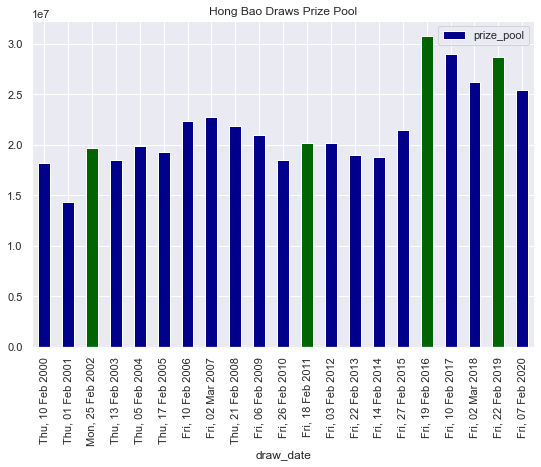

In [35]:
color_map = {
    0: 'darkblue',
    1: 'darkgreen',
    2: 'darkorange',
    3: 'darkred'
}

ax = hong_baos_draws.plot.bar(x='draw_date', y='prize_pool', color=hong_baos_draws['consecutive'].map(color_map), figsize=(9, 6));
ax.set_title('Hong Bao Draws Prize Pool');

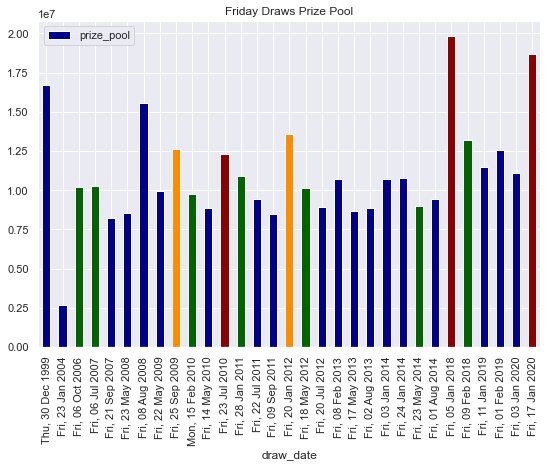

In [36]:
ax = fridays_draws.plot.bar(x='draw_date', y='prize_pool', color=fridays_draws['consecutive'].map(color_map), figsize=(9, 6));
ax.set_title('Friday Draws Prize Pool');

/Users/yongjun/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/Users/yongjun/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


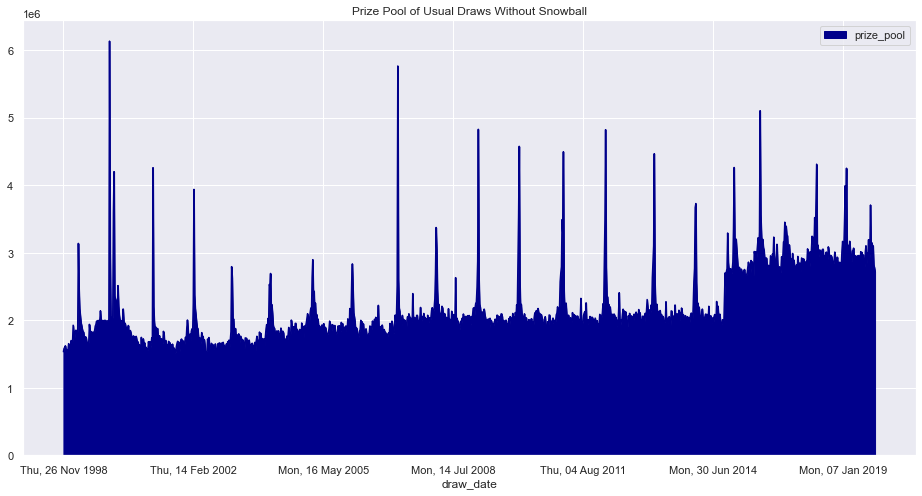

In [37]:
wo_snowball = usual_draws[draws['consecutive'] == 0]
ax = wo_snowball.plot.area(x='draw_date', y='prize_pool', color='darkblue', figsize=(16, 8));
ax.set_title('Prize Pool of Usual Draws Without Snowball');

## History

In [38]:
draws['year'] = pd.to_datetime(draws['draw_date']).dt.to_period('Y').astype(str)

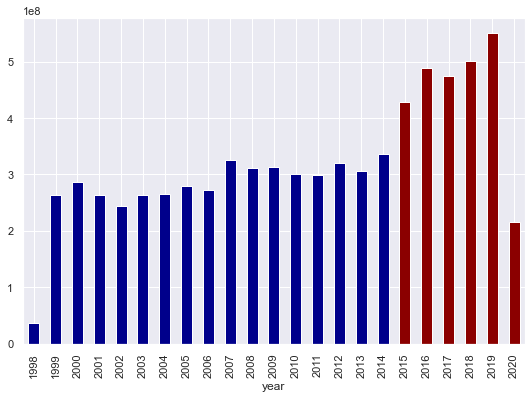

In [39]:
revenue_yearly = draws.groupby('year')['prize_pool'].sum()
revenue_yearly.plot.bar(color=revenue_yearly.index.map(lambda y: 'darkred' if y >= '2015' else 'darkblue'), figsize=(9, 6));

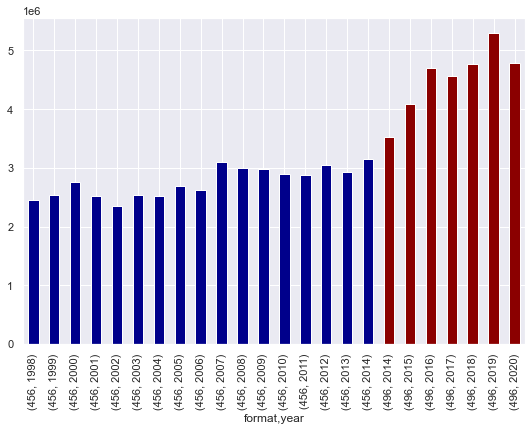

In [40]:
revenue_per_draw = draws.groupby(['format','year'])['prize_pool'].mean()
revenue_per_draw.plot.bar(color=revenue_per_draw.index.map(lambda i: 'darkred' if i[0] == '496' else 'darkblue'), figsize=(9, 6));

## Expected payoff

In [41]:
usual_draws.groupby(['format', 'consecutive'])['payoff'].mean().unstack().T

format,456,496
consecutive,,
0,0.427609,0.357054
1,0.522660,0.440475
2,0.614141,0.521128
3,0.668778,0.750589


In [42]:
mean_payoff = draws['total_distributed'].sum() / (draws['prize_pool'].sum() / 0.5)
mean_payoff

0.5076615215387708

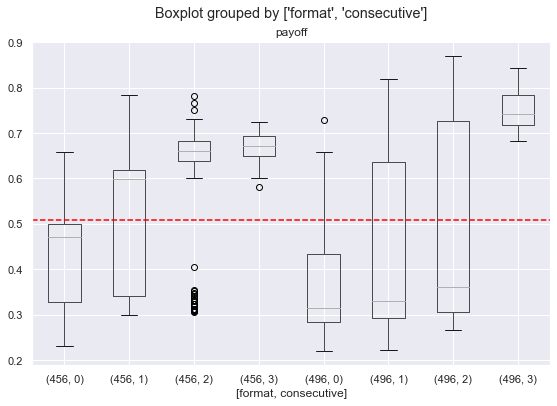

In [43]:
ax = usual_draws.boxplot('payoff', by=['format', 'consecutive'], figsize=(9, 6));
ax.axhline(mean_payoff, color='red', linestyle='--');

In [44]:
draws[draws.index >= 3568].groupby('consecutive')['payoff'].mean()

consecutive
0    0.375632
1    0.629806
Name: payoff, dtype: float64

In [78]:
hong_baos_draws['payoff'].mean()

0.5845352076087037

In [79]:
fridays_draws['payoff'].mean()

0.6021417722748551

## Why more participants is better

In [45]:
shares_subset = shares[(shares['group'] == 'Group 1') & shares['snowballed'].isna() & (shares['numberOfShares'] > 0) & (shares['numberOfShares'] <= 5)]
shares_subset = pd.merge(shares_subset, draws, how='inner', right_index=True, left_on='draw')
shares_subset = shares_subset[~shares_subset['unusual'] & (shares_subset['format'] == '456')]

In [46]:
median_prize_pool = shares_subset['prize_pool'].median()
shares_subset['more_or_less'] = shares_subset['prize_pool'] > median_prize_pool

In [47]:
pivot = shares_subset.pivot_table(['prize_pool', 'numberOfShares', 'shareAmount'], index='more_or_less', aggfunc='mean')
pd.concat([pivot['prize_pool'].apply('{:,.0f}'.format), pivot['numberOfShares'].apply('{:.5f}'.format), pivot['shareAmount'].apply('{:,.0f}'.format)], axis=1)

,prize_pool,numberOfShares,shareAmount
more_or_less,,,
False,"1,794,960",1.56794,"462,033"
True,"2,230,982",1.64460,"552,892"


## Monday vs Thursday

In [48]:
usual_draws.loc[usual_draws['day_of_week'] == 6, 'day_of_week'] = 1

In [49]:
mon_thur_breakdown = usual_draws.groupby(['format', 'consecutive', 'day_of_week'])['prize_pool'].agg(['count', 'mean'])

In [50]:
mean_revenue_by_consecutive = usual_draws.groupby(['format', 'consecutive'])['prize_pool'].mean()
mon_thur_diff = ((mon_thur_breakdown['mean'] / mon_thur_breakdown.index.map(lambda i: mean_revenue_by_consecutive[i[:-1]]) - 1) * 100).apply('{:.2f}%'.format)
mon_thur_diff.name = 'diff'

In [51]:
pd.concat([mon_thur_breakdown.applymap('{:,.0f}'.format), mon_thur_diff], axis=1)

count       mean    diff
format consecutive day_of_week                         
456    0           1             533  2,054,788   3.12%
                   4             486  1,924,494  -3.42%
       1           1             216  2,878,728   2.52%
                   4             217  2,737,791  -2.50%
       2           1              63  4,719,084   6.20%
                   4              77  4,218,278  -5.07%
       3           1              16  8,101,307  -0.68%
                   4               6  8,304,113   1.81%
496    0           1             129  3,040,307   2.26%
                   4             103  2,888,858  -2.83%
       1           1              75  4,022,984   4.38%
                   4              95  3,721,068  -3.46%
       2           1              60  5,704,786   2.64%
                   4              46  5,366,707  -3.44%
       3           1              22  9,702,471  -0.53%
                   4              30  9,792,802   0.39%

## Winning shares

In [52]:
shares['format'] = shares['draw'].map(draws['format'])
shares_subset = shares[~shares['draw'].map(draws['unusual']) & (shares['draw'] < 3568)].copy()

In [53]:
shares_subset.groupby(['format', 'group'])['shareAmount'].describe().applymap('{:,.0f}'.format)

count       mean        std      min        25%        50%  \
format group                                                                 
456    Group 1  1,614    893,004    651,528   21,301    557,751    661,070   
       Group 2  1,614     69,779     58,887    2,018     36,985     52,664   
       Group 3  1,614      1,351        363      194      1,115      1,354   
       Group 4  1,614        527        127      161        442        534   
       Group 5  1,614         30          0       30         30         30   
       Group 6  1,614         20          0       20         20         20   
496    Group 1    560  2,647,944  2,021,274  222,182  1,117,079  2,328,774   
       Group 2    560    211,950    387,803   23,758     77,292    121,084   
       Group 3    560      1,781        478      335      1,486      1,763   
       Group 4    560        382         91      106        326        384   
       Group 5    560         50          0       50         50         50   
       Group 6    560         25          0       25         25         25   
       Group 7    560         10          0       10         10         10   

                      75%        max  
format group                          
456    Group 1  1,272,189  6,518,692  
       Group 2     80,149    626,141  
       Group 3      1,590      2,817  
       Group 4        615      1,028  
       Group 5         30         30  
       Group 6         20         20  
496    Group 1  2,944,456  9,731,377  
       Group 2    230,093  4,559,710  
       Group 3      2,075      3,689  
       Group 4        443        751  
       Group 5         50         50  
       Group 6         25         25  
       Group 7         10         10

In [54]:
shares_subset[shares_subset['group'] <= 'Group 2'].groupby(['format', 'group'])['numberOfShares'].describe().applymap('{:,.1f}'.format)

count mean  std  min  25%  50%  75%    max
format group                                                
456    Group 1  1,614.0  1.2  1.6  0.0  0.0  1.0  2.0   29.0
       Group 2  1,614.0  7.0  6.7  0.0  4.0  6.0  9.0  196.0
496    Group 1    560.0  0.5  0.9  0.0  0.0  0.0  1.0    5.0
       Group 2    560.0  3.4  2.8  0.0  1.0  3.0  5.0   15.0

## Buying behavior

In [55]:
outlets['format'] = outlets['draw'].map(draws['format'])
pivot_bet_type = outlets[outlets['draw'] < 3568].pivot_table('draw', index='bet_type', columns=['format', outlets['draw'].map(draws['consecutive'])], aggfunc='count')

In [56]:
bet_types = [
    'Ordinary Entry',
    'System 7 Entry',
    'System 8 Entry',
    'System 9 Entry',
    'System 10 Entry',
    'System 11 Entry',
    'System 12 Entry',
    'iTOTO - System 12',
    'System Roll Entry'
]
pivot_bet_type = pivot_bet_type.reindex(index=bet_types)
pivot_bet_type

format                456                          496                     
draw                    0       1      2      3      0      1      2      3
bet_type                                                                   
Ordinary Entry     1920.0  1009.0  372.0   70.0  361.0  275.0  196.0  183.0
System 7 Entry     2311.0  1232.0  485.0  117.0  280.0  249.0  225.0  196.0
System 8 Entry      375.0   218.0  116.0   27.0   52.0   44.0   49.0   47.0
System 9 Entry      120.0    76.0   45.0    8.0   10.0   11.0   10.0    7.0
System 10 Entry      66.0    54.0   15.0    7.0    5.0    7.0    4.0    5.0
System 11 Entry      17.0     8.0    8.0    1.0    NaN    NaN    3.0    2.0
System 12 Entry      45.0    36.0   14.0    4.0    5.0    4.0    7.0    6.0
iTOTO - System 12     NaN     NaN    NaN    NaN  471.0  476.0  419.0  713.0
System Roll Entry   253.0   153.0   64.0   19.0   13.0   14.0   11.0   16.0

In [57]:
pivot_bet_type.loc[pivot_bet_type.index == 'iTOTO - System 12'] /= 28

In [58]:
pivot_bet_type_total = pivot_bet_type.sum(axis=0)
pivot_bet_type = pivot_bet_type.apply(lambda row: row / pivot_bet_type_total * 100, axis=1)

In [59]:
pivot_bet_type['456'].applymap('{:,.1f}'.format)

draw,0,1,2,3
bet_type,,,,
Ordinary Entry,37.6,36.2,33.2,27.7
System 7 Entry,45.3,44.2,43.3,46.2
System 8 Entry,7.3,7.8,10.4,10.7
System 9 Entry,2.3,2.7,4.0,3.2
System 10 Entry,1.3,1.9,1.3,2.8
System 11 Entry,0.3,0.3,0.7,0.4
System 12 Entry,0.9,1.3,1.3,1.6
iTOTO - System 12,nan,nan,nan,nan
System Roll Entry,5.0,5.5,5.7,7.5


In [60]:
pivot_bet_type['496'].applymap('{:,.1f}'.format)

draw,0,1,2,3
bet_type,,,,
Ordinary Entry,48.6,44.3,37.7,37.5
System 7 Entry,37.7,40.1,43.3,40.2
System 8 Entry,7.0,7.1,9.4,9.6
System 9 Entry,1.3,1.8,1.9,1.4
System 10 Entry,0.7,1.1,0.8,1.0
System 11 Entry,nan,nan,0.6,0.4
System 12 Entry,0.7,0.6,1.3,1.2
iTOTO - System 12,2.3,2.7,2.9,5.2
System Roll Entry,1.8,2.3,2.1,3.3


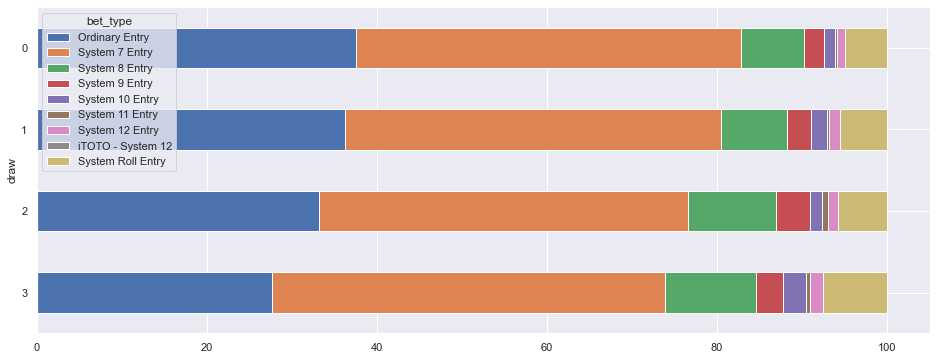

In [61]:
pivot_bet_type['456'].T.iloc[::-1, :].plot.barh(stacked=True, figsize=(16, 6));

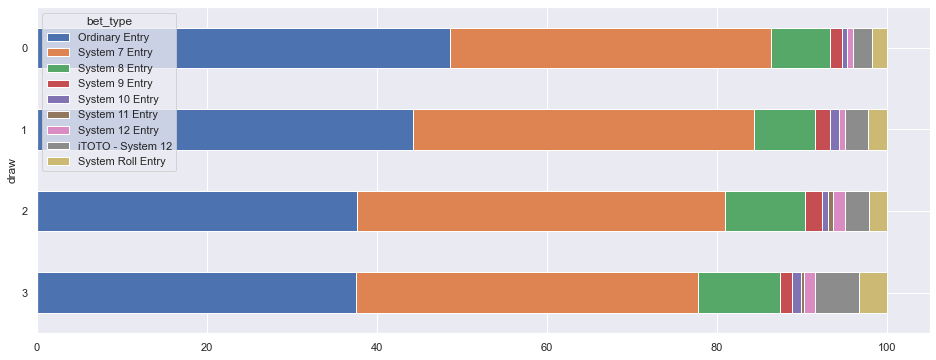

In [62]:
pivot_bet_type['496'].T.iloc[::-1, :].reindex(index=[3, 2, 1, 0]).plot.barh(stacked=True, figsize=(16, 6));

## Predicting prize pool

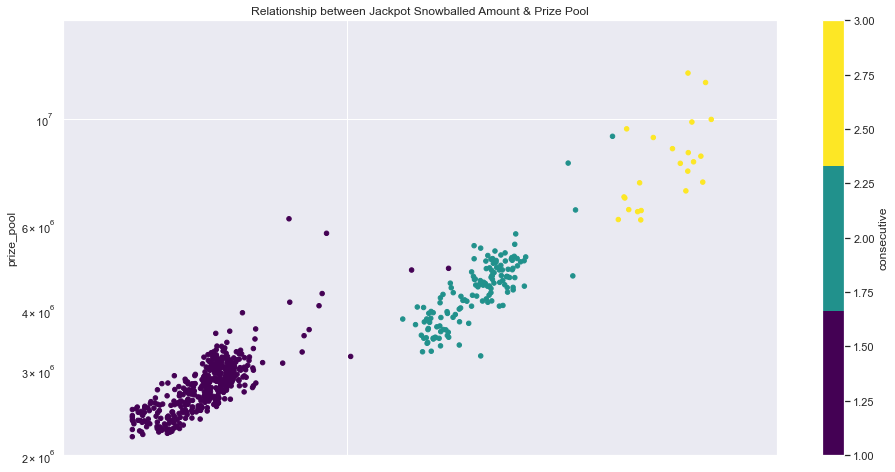

In [63]:
w_snowball = usual_draws[usual_draws['consecutive'] > 0]

from pylab import cm
w_snowball_plot_456 = w_snowball[w_snowball['format'] == '456'].plot.scatter(x='snowballed_1', y='prize_pool', c='consecutive',
                                                                             logx=True, logy=True, colormap=cm.get_cmap('viridis', 3), figsize=(16, 8));
w_snowball_plot_456.set_title('Relationship between Jackpot Snowballed Amount & Prize Pool');
w_snowball_plot_456.axis([400000, 4000000, 2000000, 16000000]);

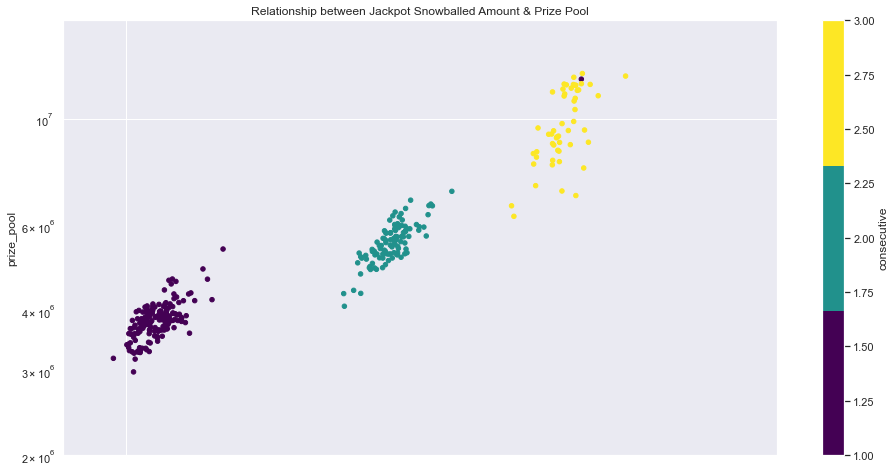

In [64]:
w_snowball_plot_496 = w_snowball[w_snowball['format'] == '496'].plot.scatter(x='snowballed_1', y='prize_pool', c='consecutive', 
                                                                             logx=True, logy=True, colormap=cm.get_cmap('viridis', 3), figsize=(16, 8));
w_snowball_plot_496.set_title('Relationship between Jackpot Snowballed Amount & Prize Pool');
w_snowball_plot_496.axis([800000, 10000000, 2000000, 16000000]);

## Regression

In [65]:
draws['last_unusual'] = draws['unusual'].shift(1, fill_value=False)
draws['last_consecutive'] = draws['consecutive'].shift(1)
draws['last_prize_pool'] = draws['prize_pool'].shift(1)

In [66]:
draws_subset = draws[draws.index < 3568].iloc[1:, :]
draws_subset = draws_subset[~draws_subset['unusual'] & ~draws_subset['last_unusual']]
draws_subset['color_group'] = (draws_subset['consecutive'] - draws_subset['last_consecutive']).astype('int')

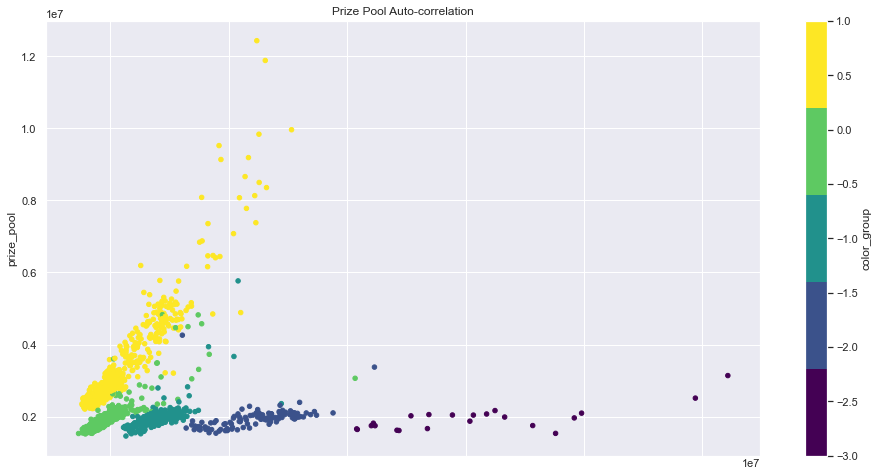

In [67]:
auto_corr_plot = draws_subset[(draws_subset['format'] == '456')].plot.scatter(x='last_prize_pool', y='prize_pool', c='color_group',
                                           colormap=cm.get_cmap('viridis', 5), figsize=(16, 8));
auto_corr_plot.set_title('Prize Pool Auto-correlation');

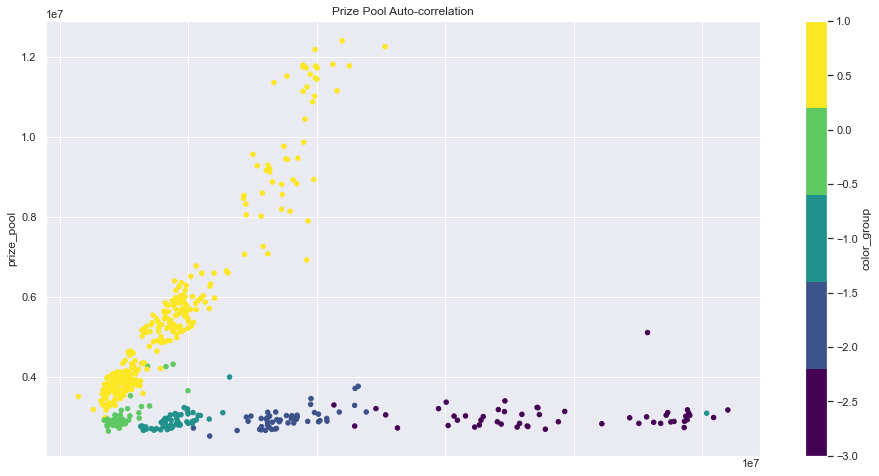

In [68]:
auto_corr_plot = draws_subset[(draws_subset['format'] == '496')].plot.scatter(x='last_prize_pool', y='prize_pool', c='color_group',
                                           colormap=cm.get_cmap('viridis', 5), figsize=(16, 8));
auto_corr_plot.set_title('Prize Pool Auto-correlation');

In [69]:
draws_subset['group'] = draws_subset['color_group'].astype('category')

In [70]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

def ols(data, subset = None):
    model = smf.ols('prize_pool ~ group:last_prize_pool + group - 1', data, subset=subset)
    fitted = model.fit()
    return fitted, model

In [71]:
fitted_456, model_456 = ols(draws_subset, draws_subset['format'] == '456')
fitted_496, model_496 = ols(draws_subset, draws_subset['format'] == '496')

In [72]:
fitted_456.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             prize_pool   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     1545.
Date:                Thu, 27 Aug 2020   Prob (F-statistic):               0.00
Time:                        17:37:05   Log-Likelihood:                -22235.
No. Observations:                1568   AIC:                         4.449e+04
Df Residuals:                    1558   BIC:                         4.454e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
group[-3]                  6.944e+05   3.64e+05      1.909      0.056   -1.91e+04    1.41e+06
group[-2]                  1.033e+06   2.38e+05      4.344      0.000    5.67e+05     1.5e+06
group[-1]                   2.43e+04   1.83e+05      0.133      0.894   -3.34e+05    3.83e+05
group[0]                   2.834e+05   8.96e+04      3.164      0.002    1.08e+05    4.59e+05
group[1]                  -1.303e+06    5.7e+04    -22.855      0.000   -1.42e+06   -1.19e+06
group[-3]:last_prize_pool     0.1532      0.044      3.511      0.000       0.068       0.239
group[-2]:last_prize_pool     0.2076      0.053      3.897      0.000       0.103       0.312
group[-1]:last_prize_pool     0.6931      0.065     10.677      0.000       0.566       0.820
group[0]:last_prize_pool      0.8591      0.045     19.259      0.000       0.772       0.947
group[1]:last_prize_pool      2.1271      0.025     85.261      0.000       2.078       2.176
==============================================================================
Omnibus:                     1120.490   Durbin-Watson:                   2.374
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            81467.826
Skew:                           2.638   Prob(JB):                         0.00
Kurtosis:                      37.916   Cond. No.                     5.77e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.77e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [73]:
fitted_496.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             prize_pool   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     1106.
Date:                Thu, 27 Aug 2020   Prob (F-statistic):               0.00
Time:                        17:37:05   Log-Likelihood:                -7919.7
No. Observations:                 547   AIC:                         1.586e+04
Df Residuals:                     537   BIC:                         1.590e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
group[-3]                  2.876e+06   3.98e+05      7.219      0.000    2.09e+06    3.66e+06
group[-2]                  1.308e+06   6.82e+05      1.917      0.056   -3.24e+04    2.65e+06
group[-1]                  2.676e+06   2.24e+05     11.940      0.000    2.24e+06    3.12e+06
group[0]                  -3.657e+05   7.65e+05     -0.478      0.633   -1.87e+06    1.14e+06
group[1]                  -2.613e+06   1.01e+05    -25.979      0.000   -2.81e+06   -2.42e+06
group[-3]:last_prize_pool     0.0143      0.040      0.355      0.723      -0.065       0.094
group[-2]:last_prize_pool     0.2979      0.123      2.424      0.016       0.056       0.539
group[-1]:last_prize_pool     0.0556      0.055      1.003      0.316      -0.053       0.164
group[0]:last_prize_pool      1.1322      0.256      4.421      0.000       0.629       1.635
group[1]:last_prize_pool      2.1822      0.027     81.695      0.000       2.130       2.235
==============================================================================
Omnibus:                       96.884   Durbin-Watson:                   2.372
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1569.470
Skew:                          -0.071   Prob(JB):                         0.00
Kurtosis:                      11.297   Cond. No.                     1.14e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.14e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

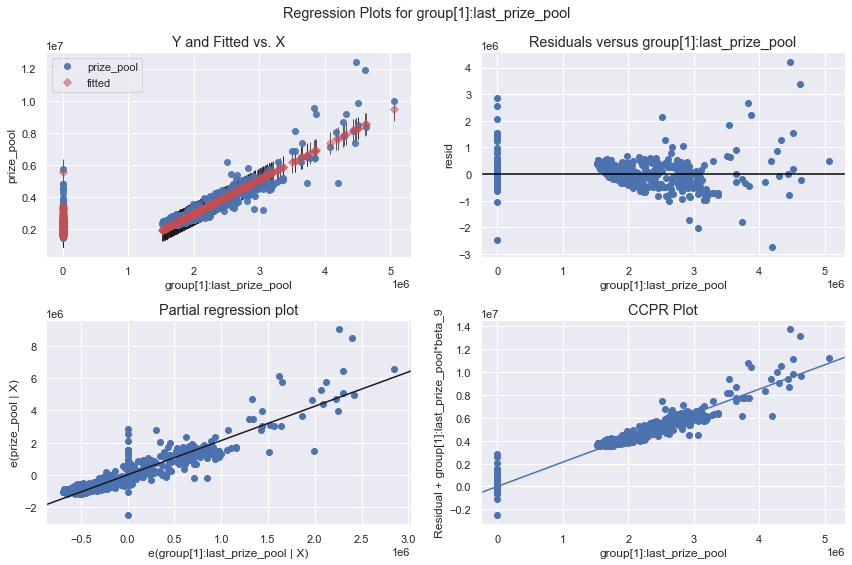

In [74]:
fig = plt.figure(figsize=(12, 8))
fig = sm.graphics.plot_regress_exog(fitted_456, 'group[1]:last_prize_pool', fig=fig)

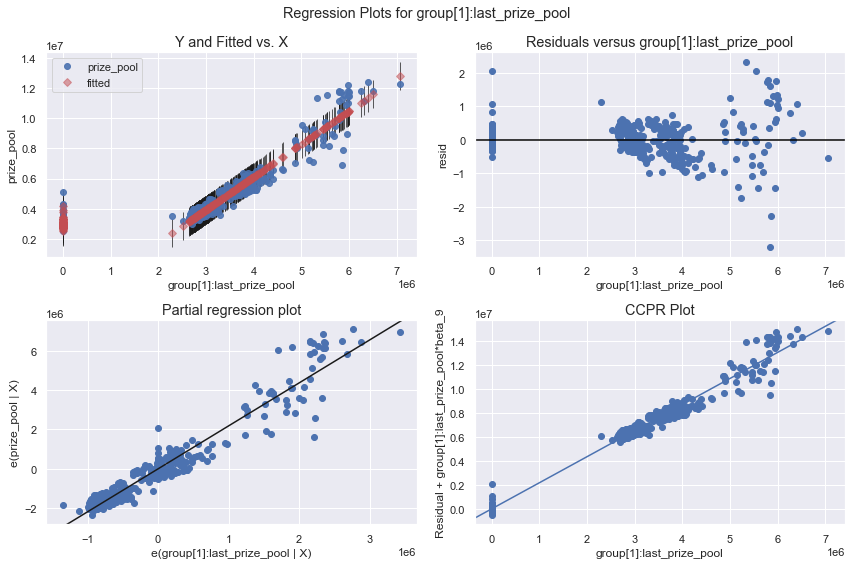

In [75]:
fig = plt.figure(figsize=(12, 8))
fig = sm.graphics.plot_regress_exog(fitted_496, 'group[1]:last_prize_pool', fig=fig)

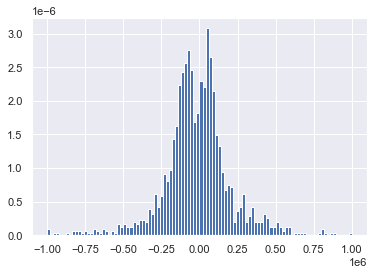

In [76]:
fitted_456.resid.hist(bins=100, density=True, range=(-1000000, 1000000));

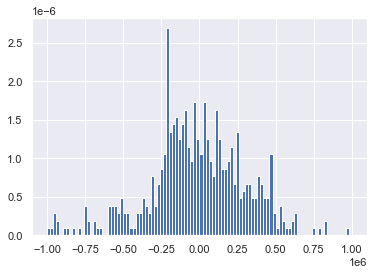

In [77]:
fitted_496.resid.hist(bins=100, density=True, range=(-1000000, 1000000));